In [1]:
#2.1 Loading the audio file:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate

#reading the wav file
rate, y_in = wavfile.read("echo_signal_random.wav")
y_in = y_in.astype(float) / 32767 #converting to float for processing

#PTQ_1
#max value of the audio sample:
print("The maximum value of the audio sample: ", np.max(y_in))

#PTQ_2
#min value of the audio sample:
print("The minimum value of the audio sample: ", np.min(y_in))

#PTQ_3
#total length of the audio sample:
print("The total length of the audio sample: ", len(y_in))

The maximum value of the audio sample:  0.7250282296212653
The minimum value of the audio sample:  -1.0
The total length of the audio sample:  64


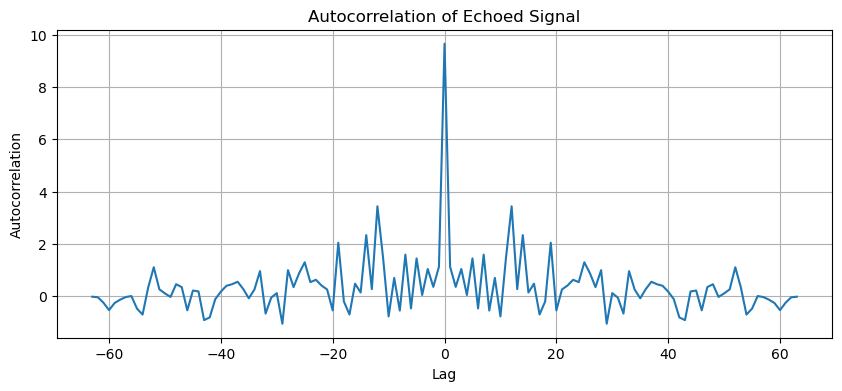

The total length of the Autocorrelation created:  127
The total length of the Autocorrelation created in terms of y_in: 2* len(y_in) -1 is also:  127
The location of the highest peak in the plot:  0


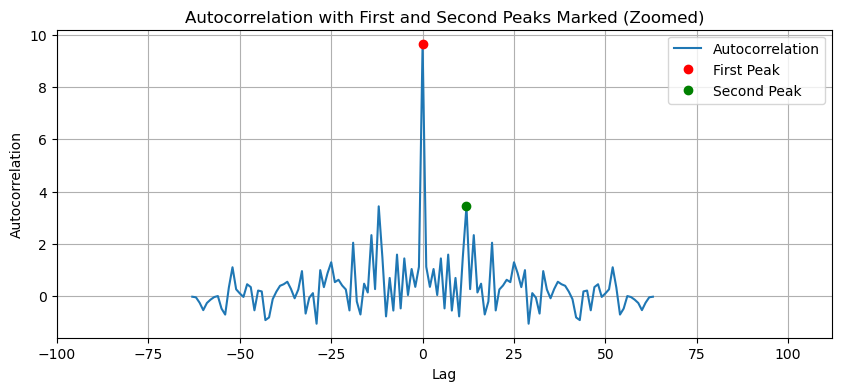

First peak lag: 0 , Second peak lag: 12
The Location of the second peak is at lags:  12
The value of the estimated delay:  12
Estimated attenuation α = 0.46930832874074707


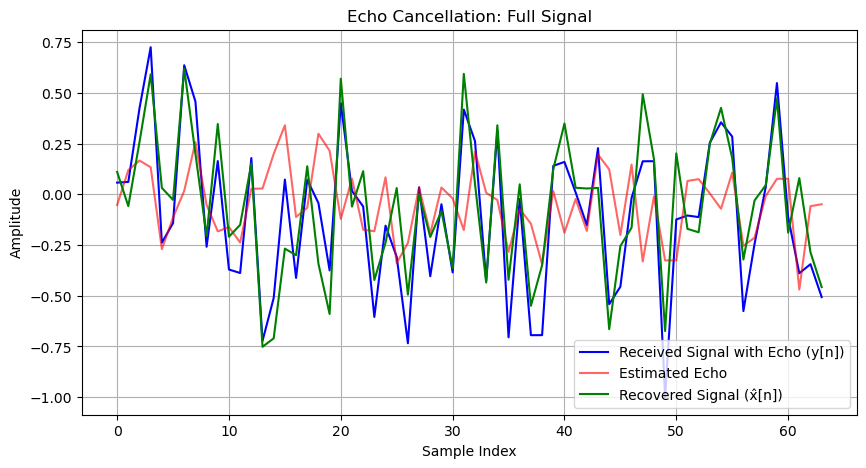

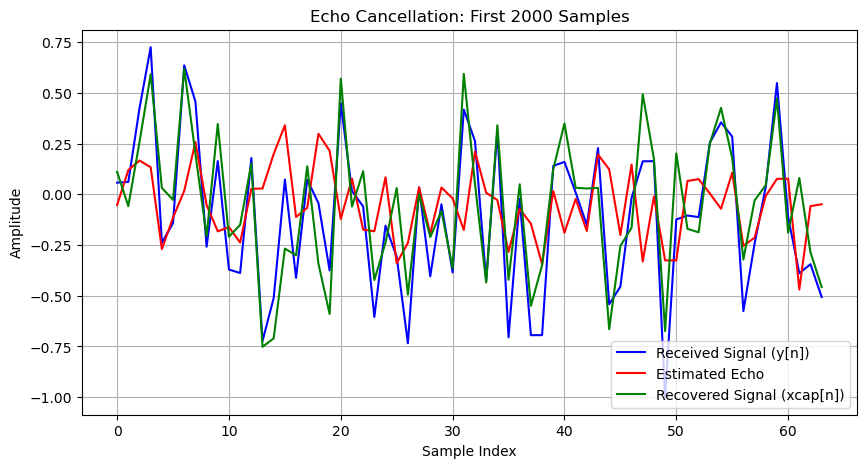

In [2]:
#2.2 Echo Delay using Autocorrelation:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate

#reading the wav file
rate, y_in = wavfile.read("echo_signal_random.wav")
y_in = y_in.astype(float) / 32767 #converting to float for processing

#2.2.1
#recompute autocorrelation:
autocorr = correlate(y_in, y_in, mode = 'full') # creating full autocorrelation
lags = np.arange(-len(y_in)+1, len(y_in))       #creating lag axis

#plotting the autocorrelation with lags  in x-axis and autocorr in y-axis:
plt.figure(figsize=(10, 4))
plt.plot(lags, autocorr)
plt.title("Autocorrelation of Echoed Signal")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

#PTQ_4
#total length of autocorr:
print("The total length of the Autocorrelation created: ",len(autocorr))

#PTQ_5
#length of autocorr in terms of length of y_in:
print("The total length of the Autocorrelation created in terms of y_in: 2* len(y_in) -1 is also: " ,2* len(y_in) -1)

#PTQ_6
#the location of the highest peak in the plot is:
print("The location of the highest peak in the plot: ",lags[np.argmax(autocorr)])

#PTQ_7
#the autocorrelation plot marking the axis values corresponding to the first two peaks:

# First peak (main correlation peak at lag = 0)
#Find the index of the first (main) peak in the autocorrelation
first_peak_index = np.argmax(autocorr)  #Global maximum of autocorrelation
first_peak_lag = lags[first_peak_index]  #Corresponding lag value (should be 0)

#Finding the second peak only on the positive lag side

#the midpoint of autocorrelation (where positive lags start)
mid = len(autocorr) // 2

#filtering only the positive lag autocorrelation values
positive_autocorr = autocorr[mid+1:]   #Skip lag=0 and negative lags
positive_lags = lags[mid+1:]           #Corresponding lags for positive side

#index of the highest peak on the positive side (second peak)
second_peak_index = np.argmax(positive_autocorr)
second_peak_lag = positive_lags[second_peak_index]  #echo delay in samples

#Plotting 
plt.figure(figsize=(10, 4))              
plt.plot(lags, autocorr, label="Autocorrelation")  #autocorrelation vs lags

# Marking the first and second peaks
plt.plot(first_peak_lag, autocorr[first_peak_index], 'ro', label='First Peak')
plt.plot(second_peak_lag, positive_autocorr[second_peak_index], 'go', label='Second Peak')


#Zooming since the peaks seem to be overalapping when plotted in the original plot
#Defining the x-axis limits to zoom into the area around the peaks
min_lag = min(first_peak_lag, second_peak_lag) - 100  #Start slightly before the smallest peak lag
max_lag = max(first_peak_lag, second_peak_lag) + 100  #End slightly after the largest peak lag
plt.xlim(min_lag, max_lag) #This will make both red and green dots clearly visible.

# Add legend, title, labels, and grid
plt.legend()
plt.title("Autocorrelation with First and Second Peaks Marked (Zoomed)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# Display the plot
plt.show()

print("First peak lag:", first_peak_lag, ", Second peak lag:", second_peak_lag)

#2.2.2
#estimation of the delay:
#finding the peak in the positive lags side (excluding log 0)
d_delay = positive_lags[second_peak_index]

#PTQ_8
#location of the second peak:
print("The Location of the second peak is at lags: ",second_peak_lag)

#The value of the estimated delay, d_delay:
print("The value of the estimated delay: ",d_delay)



#2.3 Estimation of Autocorrelation:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate

#reading the wav file
rate, y_in = wavfile.read("echo_signal_random.wav")
y_in = y_in.astype(float) / 32767 #converting to float for processing

#function to estimate attenuation using projection:
def estimate_attenuation(y_signal,d_delay):

    y_delayed = np.roll(y_signal,d_delay)  #circular shifting
    numerator = np.dot(y_signal,y_delayed) 
    denominator = np.dot(y_delayed,y_delayed) 
    if denominator == 0:
        return 0  # Prevent division by zero
    return numerator / denominator
    
#PTQ_9   
#estimate attenuation:
estimated_alpha = estimate_attenuation(y_in, d_delay)
print("Estimated attenuation α =",estimated_alpha)


#2.4 Echo cancellation:
#Create the delayed version of the received signal (estimated echo location)
estimated_echo = np.roll(y_in, d_delay)

#Multiply by the estimated attenuation
estimated_echo = estimated_alpha * estimated_echo

#Subtract to recover the original signal
x_hat = y_in - estimated_echo

#PTQ_10
#plotting
plt.figure(figsize=(10, 5))

# Plot full signals
plt.plot(y_in, label="Received Signal with Echo (y[n])", color='blue')
plt.plot(estimated_echo, label="Estimated Echo", color='red', alpha=0.6)
plt.plot(x_hat, label="Recovered Signal (x̂[n])", color='green')

plt.title("Echo Cancellation: Full Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

#Zoomed-in 
plt.figure(figsize=(10, 5))
zoom_range = 2000

plt.plot(y_in[:zoom_range], label="Received Signal (y[n])", color='blue')
plt.plot(estimated_echo[:zoom_range], label="Estimated Echo", color='red')
plt.plot(x_hat[:zoom_range], label="Recovered Signal (xcap[n])", color='green')

plt.title(f"Echo Cancellation: First {zoom_range} Samples")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
#2.5 Part2: DFT Properties Verification:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate

#reading the wav file
rate, y_in = wavfile.read("echo_signal_random.wav")
y_in = y_in.astype(float) / 32767 #converting to float for processing

#2.5.1: Time reversal property
from numpy.fft import fft, ifft

N = len(y_in)
y_in_rev = y_in.copy()
y_in_rev[1:] = y_in_rev[1:][::-1]  # Reverse all except index 0

Y = fft(y_in)  # DFT of original signal

k = np.arange(N)
Y_N_refl_shift = Y[-k % N] #finding Y[-k (mod N)] for each value of k
Y_rev = fft(y_in_rev) #compute the DFT of time reversed signal y_in_rev

#PTQ_11
#finding the sum of square of abs(Y_N_refl_shift-y_in_rev)
verification_err = np.sum(np.abs(Y_rev - Y_N_refl_shift)**2)
print("Time reversal verification error:", verification_err)

#PTQ_12
#min value of N:
print("The minimum value of N is: ", len(y_in))

#2.5.2: Circular Shifting property
n0 = 12 #delaying y_in by 12
y_in_shifted = np.roll(y_in, n0)
Y_shifted_dft = fft(y_in_shifted)

k = np.arange(N)
Y_expected_shift_dft = Y * np.exp(-1j * 2 * np.pi * k * n0 / N)

#PTQ_13
verification_err = np.sum(np.abs(Y_shifted_dft - Y_expected_shift_dft)**2)
print("Circular time shift verification error:", verification_err)

#2.5.3: Frequency Shift Property
k0 = 3 #setting the frequency shift to 3
n = np.arange(N)
y_in_freq_shifted = y_in * np.exp(1j * 2 * np.pi * k0 * n / N)

Y_freq_shifted = fft(y_in_freq_shifted)
Y_expected_freq_shift = np.roll(Y, k0)

#PTQ_14
verification_err = np.sum(np.abs(Y_freq_shifted - Y_expected_freq_shift)**2)
print("Frequency shift verification error:", verification_err)

#2.5.4: Circular Convolution Property
def circular_convolution(x, h):
    N = len(x)
    x = np.array(x)
    h = np.array(h)
    result = np.zeros(N)  # Allocate output array
    
    for n in range(N):
        for m in range(N):
            result[n] += x[m] * h[(n - m) % N]  # Circular index
    return result
    
h = np.random.randn(N)  # Random Gaussian sequence
y_circ = np.real(ifft(fft(y_in) * fft(h)))  # IDFT of product
y_circ_direct = circular_convolution(y_in, h)

verification_err = np.sum(np.abs(y_circ - y_circ_direct)**2)
print("Circular convolution verification error:", verification_err)



Time reversal verification error: 1.9104069490354747e-29
The minimum value of N is:  64
Circular time shift verification error: 8.440250656891579e-27
Frequency shift verification error: 2.5455692892359593e-28
Circular convolution verification error: 8.734246372191666e-29
